# Exploratory Data Analysis - IRIS

## Importing the important libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [17]:
# Reading the data of CSV file
a = pd.read_csv("Iris.csv")

In [18]:
# Creating a dataframe for dataset
df = pd.DataFrame(a)

In [19]:
# Displaying the sample data of dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
# Showcasing the number of rows and columns
df.shape

(150, 6)

In [21]:
# Displaying the information for the dataset
df.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [22]:
# Checking for the missing values in Dataset 
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [23]:
# Checking for the number of duplicates
df.duplicated().any(axis=0)

False

In [24]:
# Checking for the Na values 
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Univariate Analysis

## For variable SepalLengthCm

In [25]:
df['SepalLengthCm'].value_counts()

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: SepalLengthCm, dtype: int64

In [26]:
print('Range of values: ', df['SepalLengthCm'].max()-df['SepalLengthCm'].min())

Range of values:  3.6000000000000005


In [27]:
print('Minimum SepalLengthCm : ', df['SepalLengthCm'].min())
print('Maximum SepalLengthCm : ', df['SepalLengthCm'].max())
print('Mean value : ', df['SepalLengthCm'].mean())
print('Median value : ', df['SepalLengthCm'].median())
print('Standard deviation : ', df['SepalLengthCm'].std())
print('Null values : ', df['SepalLengthCm'].isnull().any())

Minimum SepalLengthCm :  4.3
Maximum SepalLengthCm :  7.9
Mean value :  5.843333333333334
Median value :  5.8
Standard deviation :  0.8280661279778629
Null values :  False


In [28]:
Q1= df['SepalLengthCm'].quantile(q=0.25)
Q3= df['SepalLengthCm'].quantile(q=0.75)
print('SepalLengthCm - 1st Quartile (Q1) is: ', Q1)
print('SepalLengthCm - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of SepalLengthCm is ', stats.iqr(df['SepalLengthCm']))

SepalLengthCm - 1st Quartile (Q1) is:  5.1
SepalLengthCm - 3st Quartile (Q3) is:  6.4
Interquartile range (IQR) of SepalLengthCm is  1.3000000000000007


In [29]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in SepalLengthCm : ', L_outliers)
print('Upper outliers in SepalLengthCm : ', U_outliers)

Lower outliers in SepalLengthCm :  3.1499999999999986
Upper outliers in SepalLengthCm :  8.350000000000001


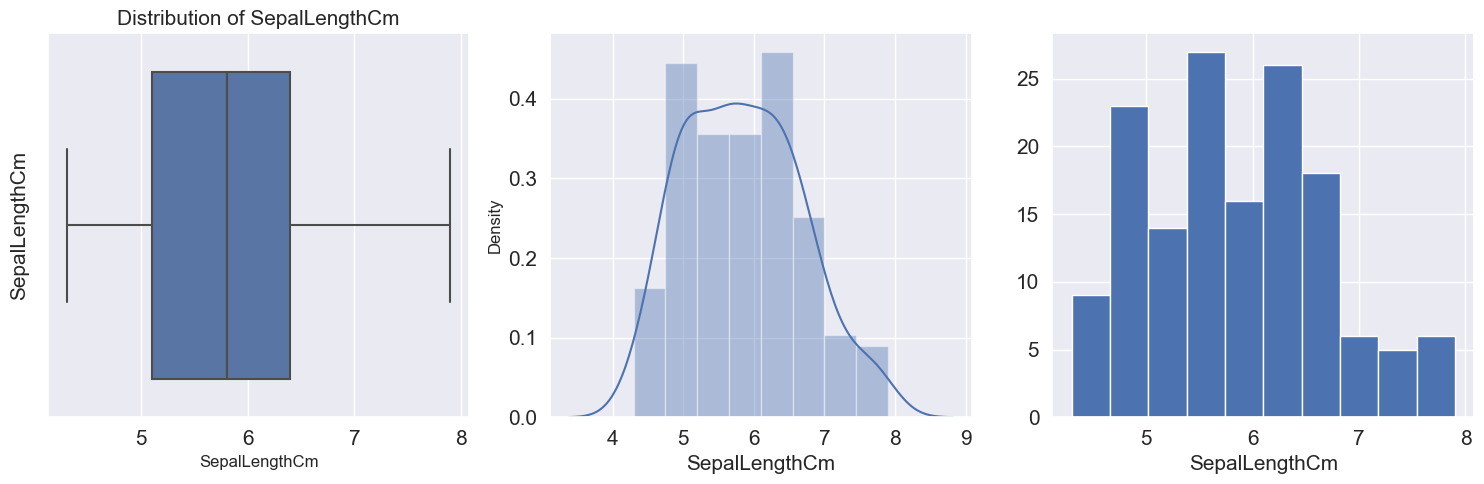

In [30]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='SepalLengthCm',data= df,orient='v',ax=ax1)
ax1.set_ylabel('SepalLengthCm', fontsize=15)
ax1.set_title('Distribution of SepalLengthCm', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['SepalLengthCm'],ax=ax2)
ax2.set_xlabel('SepalLengthCm', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['SepalLengthCm'])
ax3.set_xlabel('SepalLengthCm', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## For variable SepalWidthCm

In [31]:
df['SepalWidthCm'].value_counts()

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: SepalWidthCm, dtype: int64

In [32]:
print('Range of values: ', df['SepalWidthCm'].max()-df['SepalWidthCm'].min())

Range of values:  2.4000000000000004


In [33]:
print('Minimum SepalWidthCm : ', df['SepalWidthCm'].min())
print('Maximum SepalWidthCm : ', df['SepalWidthCm'].max())
print('Mean value : ', df['SepalWidthCm'].mean())
print('Median value : ', df['SepalWidthCm'].median())
print('Standard deviation : ', df['SepalWidthCm'].std())
print('Null values : ', df['SepalWidthCm'].isnull().any())

Minimum SepalWidthCm :  2.0
Maximum SepalWidthCm :  4.4
Mean value :  3.0540000000000003
Median value :  3.0
Standard deviation :  0.4335943113621737
Null values :  False


In [34]:
Q1= df['SepalWidthCm'].quantile(q=0.25)
Q3= df['SepalWidthCm'].quantile(q=0.75)
print('SepalWidthCm - 1st Quartile (Q1) is: ', Q1)
print('SepalWidthCm - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of SepalWidthCm is ', stats.iqr(df['SepalWidthCm']))

SepalWidthCm - 1st Quartile (Q1) is:  2.8
SepalWidthCm - 3st Quartile (Q3) is:  3.3
Interquartile range (IQR) of SepalWidthCm is  0.5


In [35]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in SepalWidthCm : ', L_outliers)
print('Upper outliers in SepalWidthCm : ', U_outliers)

Lower outliers in SepalWidthCm :  2.05
Upper outliers in SepalWidthCm :  4.05


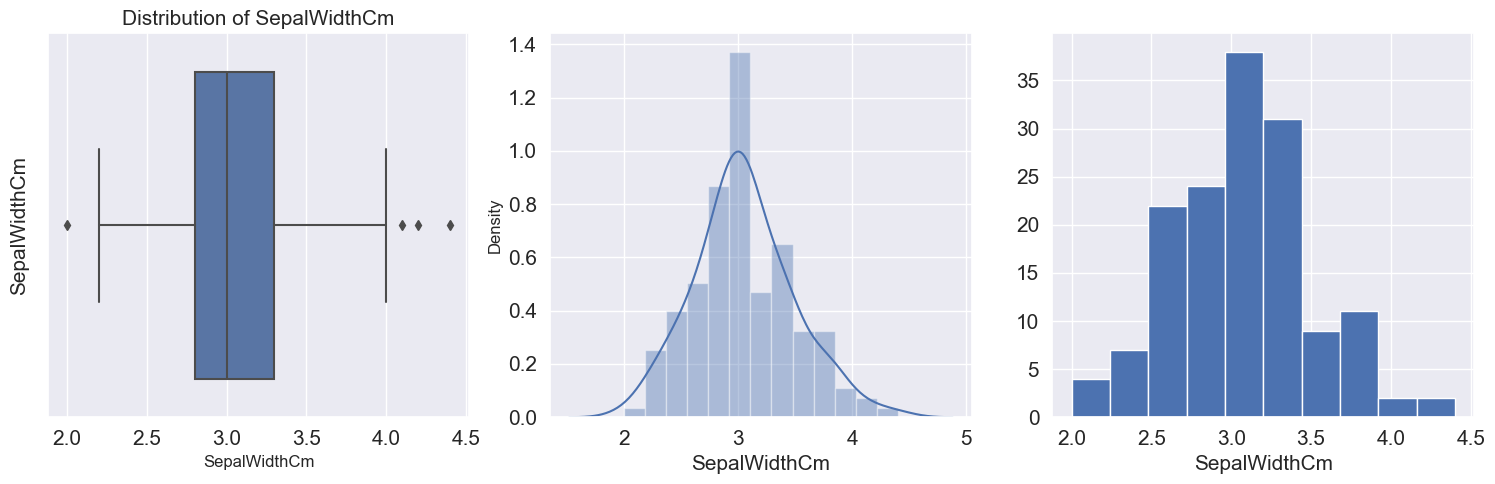

In [36]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='SepalWidthCm',data= df,orient='v',ax=ax1)
ax1.set_ylabel('SepalWidthCm', fontsize=15)
ax1.set_title('Distribution of SepalWidthCm', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['SepalWidthCm'],ax=ax2)
ax2.set_xlabel('SepalWidthCm', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['SepalWidthCm'])
ax3.set_xlabel('SepalWidthCm', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## For the variable PetalLengthCm

In [37]:
df['PetalLengthCm'].value_counts()

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7     1
3.8     1
6.6     1
6.3     1
1.0     1
6.9     1
3.6     1
6.4     1
Name: PetalLengthCm, dtype: int64

In [38]:
print('Range of values: ', df['PetalLengthCm'].max()-df['PetalLengthCm'].min())

Range of values:  5.9


In [39]:
print('Minimum PetalLengthCm : ', df['PetalLengthCm'].min())
print('Maximum PetalLengthCm : ', df['PetalLengthCm'].max())
print('Mean value : ', df['PetalLengthCm'].mean())
print('Median value : ', df['PetalLengthCm'].median())
print('Standard deviation : ', df['PetalLengthCm'].std())
print('Null values : ', df['PetalLengthCm'].isnull().any())

Minimum PetalLengthCm :  1.0
Maximum PetalLengthCm :  6.9
Mean value :  3.758666666666666
Median value :  4.35
Standard deviation :  1.7644204199522617
Null values :  False


In [40]:
Q1= df['PetalLengthCm'].quantile(q=0.25)
Q3= df['PetalLengthCm'].quantile(q=0.75)
print('PetalLengthCm - 1st Quartile (Q1) is: ', Q1)
print('PetalLengthCm - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of PetalLengthCm is ', stats.iqr(df['PetalLengthCm']))

PetalLengthCm - 1st Quartile (Q1) is:  1.6
PetalLengthCm - 3st Quartile (Q3) is:  5.1
Interquartile range (IQR) of PetalLengthCm is  3.4999999999999996


In [41]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in PetalLengthCm : ', L_outliers)
print('Upper outliers in PetalLengthCm : ', U_outliers)

Lower outliers in PetalLengthCm :  -3.649999999999999
Upper outliers in PetalLengthCm :  10.349999999999998


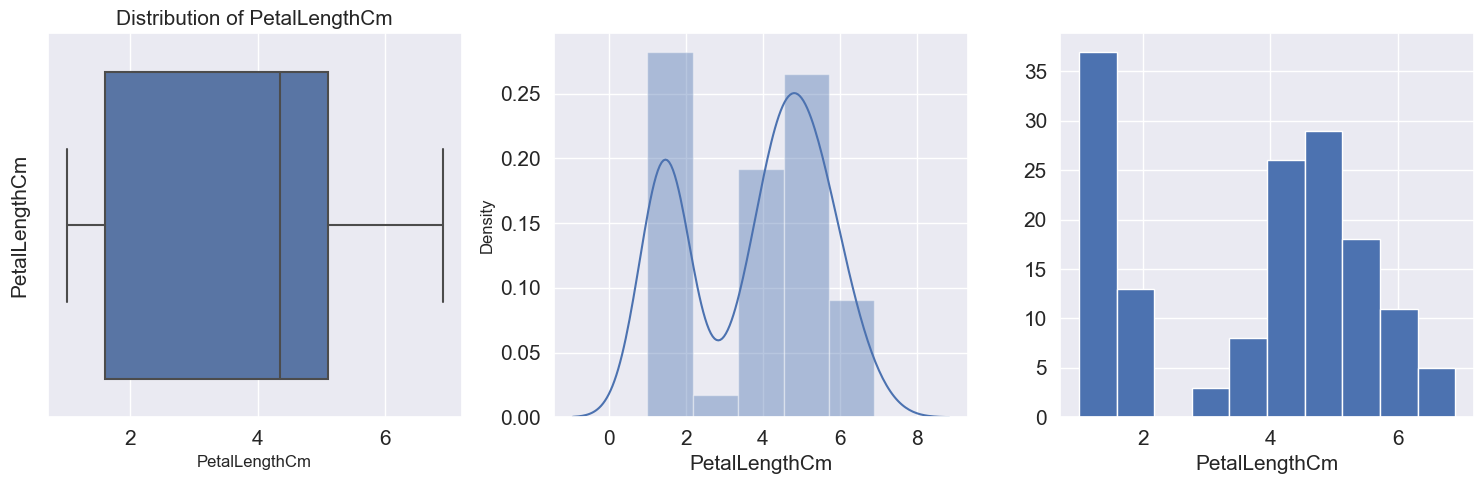

In [42]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='PetalLengthCm',data= df,orient='v',ax=ax1)
ax1.set_ylabel('PetalLengthCm', fontsize=15)
ax1.set_title('Distribution of PetalLengthCm', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['PetalLengthCm'],ax=ax2)
ax2.set_xlabel('PetalLengthCm', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['PetalLengthCm'])
ax3.set_xlabel('PetalLengthCm', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## For the variable PetalWidthCm

In [43]:
df['PetalWidthCm'].value_counts()

0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64

In [44]:
print('Range of values: ', df['PetalWidthCm'].max()-df['PetalWidthCm'].min())

Range of values:  2.4


In [45]:
print('Minimum PetalWidthCm : ', df['PetalWidthCm'].min())
print('Maximum PetalWidthCm : ', df['PetalWidthCm'].max())
print('Mean value : ', df['PetalWidthCm'].mean())
print('Median value : ', df['PetalWidthCm'].median())
print('Standard deviation : ', df['PetalWidthCm'].std())
print('Null values : ', df['PetalWidthCm'].isnull().any())

Minimum PetalWidthCm :  0.1
Maximum PetalWidthCm :  2.5
Mean value :  1.1986666666666668
Median value :  1.3
Standard deviation :  0.7631607417008414
Null values :  False


In [46]:
Q1= df['PetalWidthCm'].quantile(q=0.25)
Q3= df['PetalWidthCm'].quantile(q=0.75)
print('PetalWidthCm - 1st Quartile (Q1) is: ', Q1)
print('PetalWidthCm - 3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) of PetalWidthCm is ', stats.iqr(df['PetalWidthCm']))

PetalWidthCm - 1st Quartile (Q1) is:  0.3
PetalWidthCm - 3st Quartile (Q3) is:  1.8
Interquartile range (IQR) of PetalWidthCm is  1.5


In [47]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in PetalWidthCm : ', L_outliers)
print('Upper outliers in PetalWidthCm : ', U_outliers)

Lower outliers in PetalWidthCm :  -1.95
Upper outliers in PetalWidthCm :  4.05


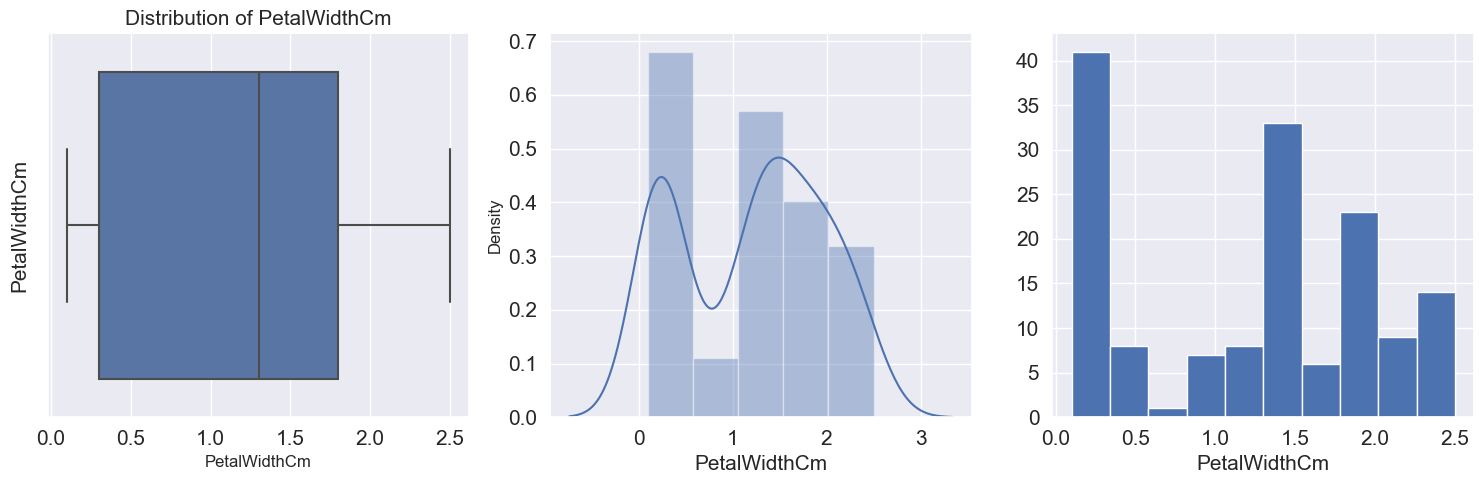

In [48]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))

#boxplot
sns.boxplot(x='PetalWidthCm',data= df,orient='v',ax=ax1)
ax1.set_ylabel('PetalWidthCm', fontsize=15)
ax1.set_title('Distribution of PetalWidthCm', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['PetalWidthCm'],ax=ax2)
ax2.set_xlabel('PetalWidthCm', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['PetalWidthCm'])
ax3.set_xlabel('PetalWidthCm', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Creating a copy of a Dataframe

In [49]:
df1 = df

In [50]:
# Dropping column Id
df1 = df1.drop('Id', axis=1)

In [51]:
# Dropping column Species
df1 = df1.drop('Species', axis=1)

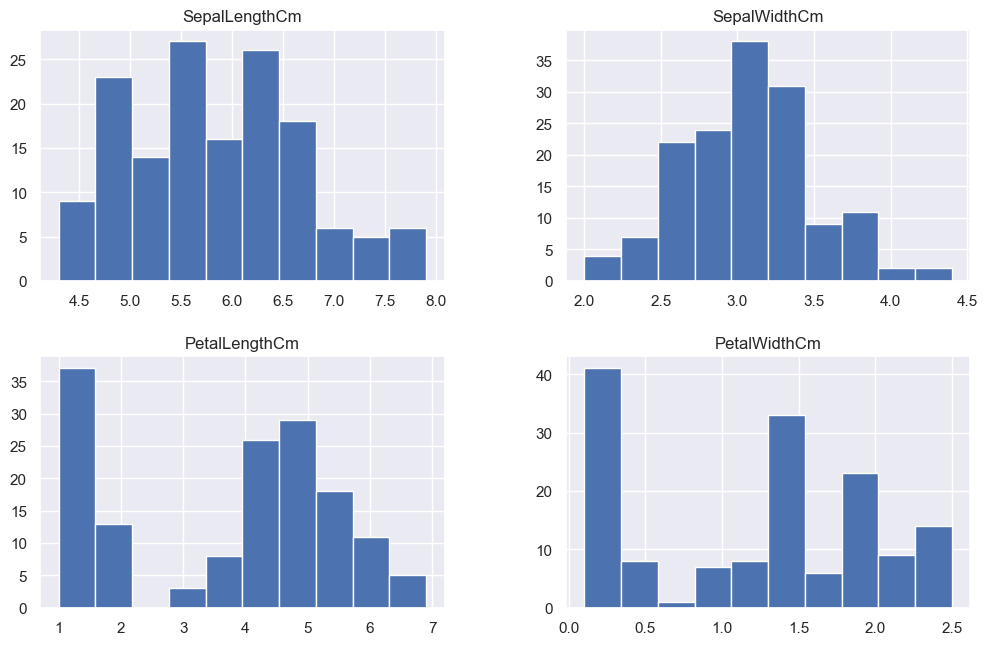

In [52]:
df1.hist(figsize=(12,16),layout=(4,2));

In [53]:
# Let's check the skewness values quantitatively
df1.skew().sort_values(ascending=False)

SepalWidthCm     0.334053
SepalLengthCm    0.314911
PetalWidthCm    -0.104997
PetalLengthCm   -0.274464
dtype: float64

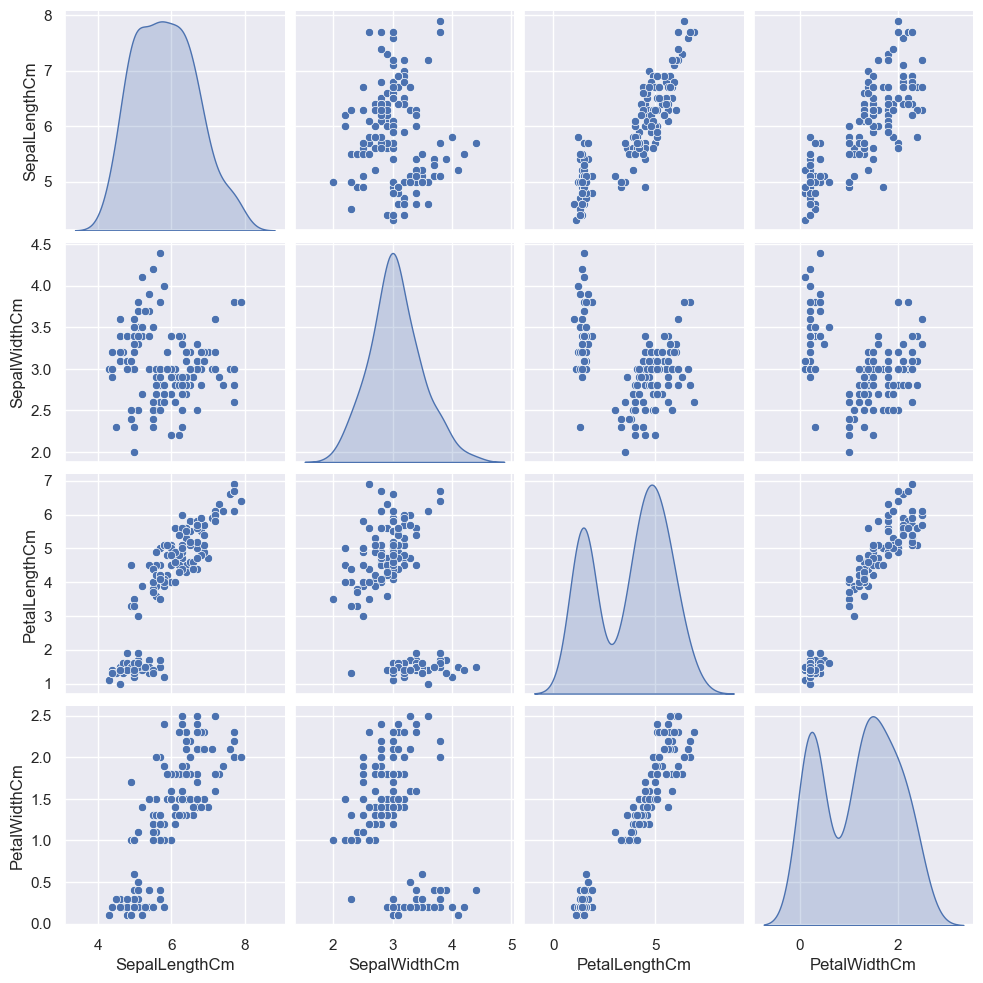

In [54]:
# Pairplot of all variables
sns.pairplot(df1,diag_kind='kde');

In [55]:
df1.corr().T

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


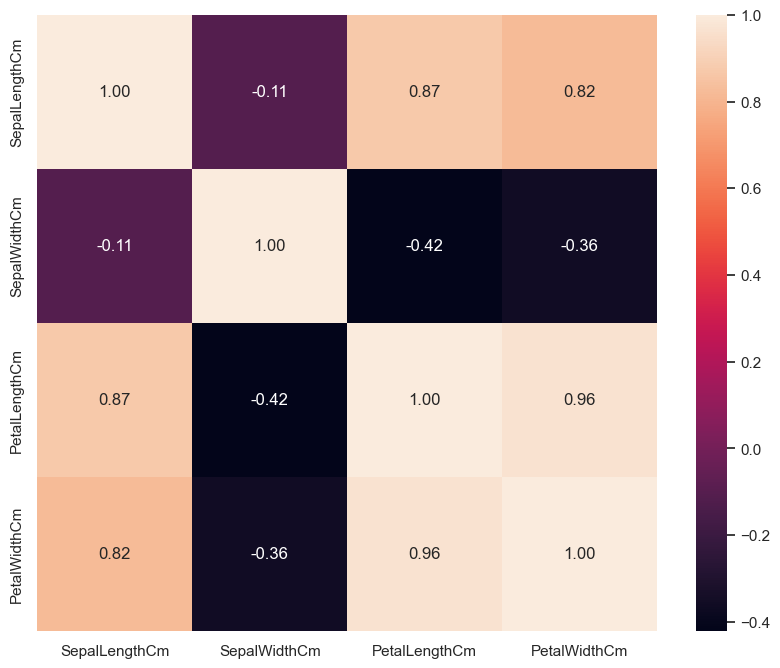

In [56]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f")
plt.show()

In [57]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df1.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1) & (so>0.3)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
PetalLengthCm PetalWidthCm      0.962757
SepalLengthCm PetalLengthCm     0.871754
              PetalWidthCm      0.817954
SepalWidthCm  PetalLengthCm     0.420516
              PetalWidthCm      0.356544

In [58]:
# Checking for number of outliers
def check_outliers(data):
    vData_num = data.loc[:,data.columns != 'class']
    Q1 = vData_num.quantile(0.25)
    Q3 = vData_num.quantile(0.75)
    IQR = Q3 - Q1
    count = 0
    # checking for outliers, True represents outlier
    vData_num_mod = ((vData_num < (Q1 - 1.5 * IQR)) |(vData_num > (Q3 + 1.5 * IQR)))
    #iterating over columns to check for no.of outliers in each of the numerical attributes.
    for col in vData_num_mod:
        if(1 in vData_num_mod[col].value_counts().index):
            print("No. of outliers in %s: %d" %( col, vData_num_mod[col].value_counts().iloc[1]))
            count += 1
    print("\n\nNo of attributes with outliers are :", count)
    
check_outliers(df1)



No of attributes with outliers are : 0


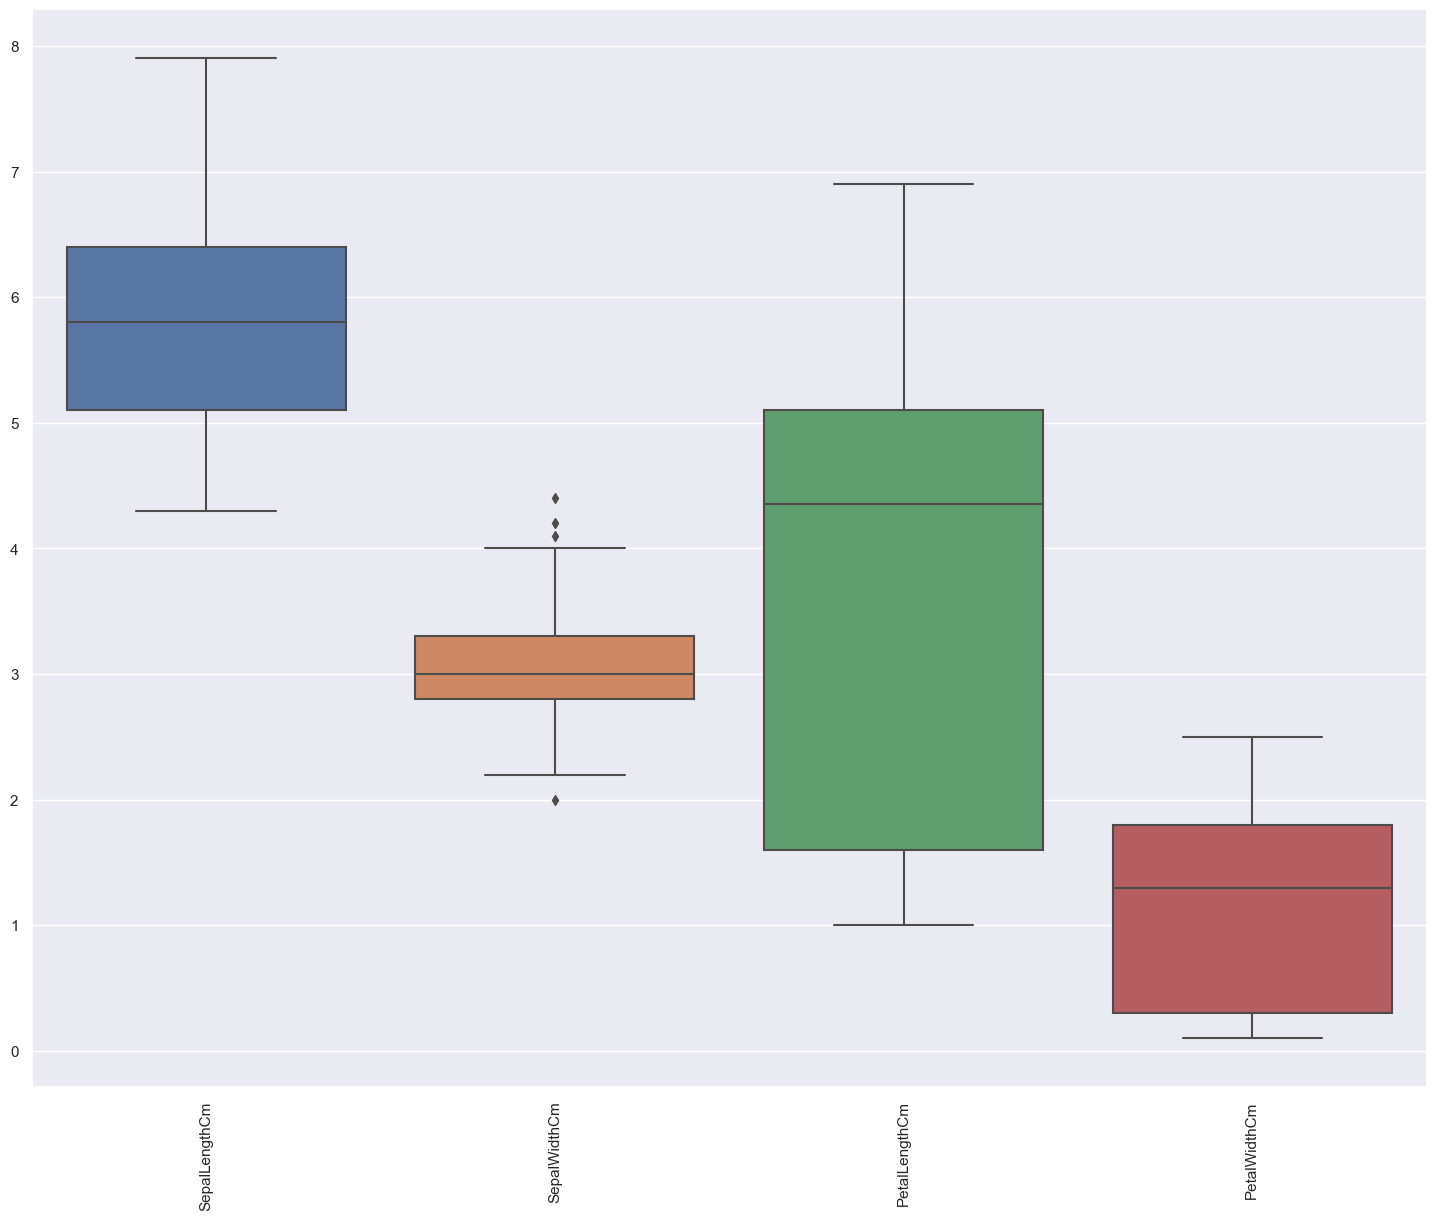

In [59]:
# Let us check presence of outliers
plt.figure(figsize=(18,14))
box = sns.boxplot(data = df1)
box.set_xticklabels(labels=box.get_xticklabels(),rotation=90);

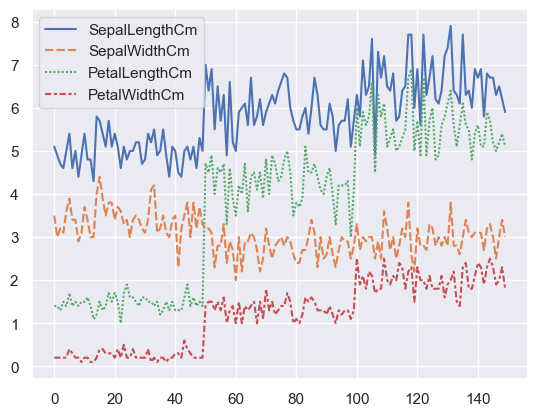

In [60]:
# Lineplot of variables of dataset
sns.lineplot(df1)
plt.show()

### Scaling the unscaled data

In [61]:
num = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(df1[num])

# Transform the numerical columns using the scaler
scaled_data = scaler.transform(df1[num])

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=num)

In [62]:
df_scaled.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


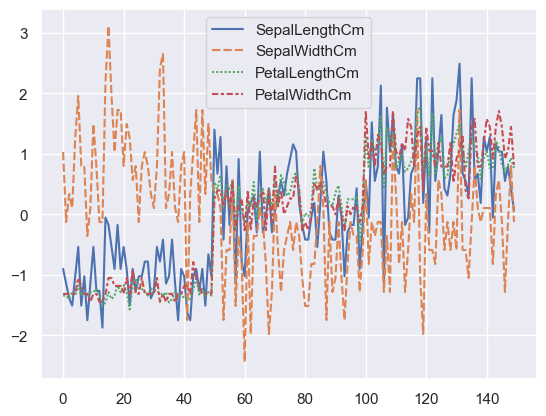

In [63]:
#after scaling
sns.lineplot(df_scaled)
plt.show()

## Applying the clustering 

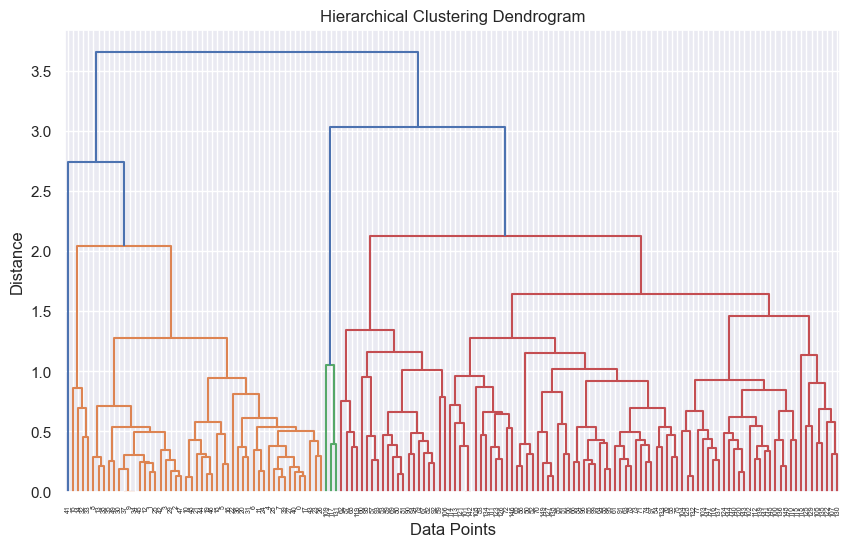

In [64]:
# Extract the data for clustering
data = df_scaled.values

# Perform hierarchical clustering
Z = linkage(df_scaled, method = 'average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

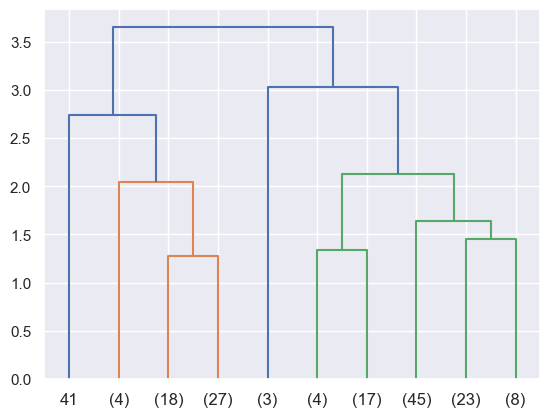

In [65]:
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 10)

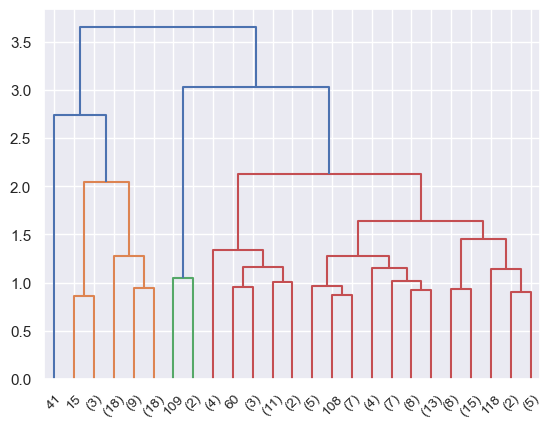

In [66]:
dend = dendrogram(Z,
                 truncate_mode='lastp',
                 p = 25)

In [67]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'

clusters = fcluster(Z, 3, criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [68]:
cluster_df = df
cluster_df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [69]:
# Creating a new column clusters-3
cluster_df['clusters-3'] = clusters

In [70]:
cluster_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters-3
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [71]:
# Checking for the frequency of clusters of each type 
cluster_df['clusters-3'].value_counts().sort_index()

1    50
2     3
3    97
Name: clusters-3, dtype: int64

In [72]:
aggdata = cluster_df.groupby('clusters-3').mean()
aggdata['Freq'] = cluster_df['clusters-3'].value_counts().sort_index()
aggdata

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Freq
clusters-3,,,,,,
1,25.500000,5.006000,3.418000,1.464000,0.244000,50
2,120.000000,7.600000,3.733333,6.400000,2.233333,3
3,99.896907,6.220619,2.845361,4.859794,1.658763,97


# Conclusion 
**After performing the Exploratory Data Analysis we get the following insights from the data:**
- After the univariate analysis of each column of dataset we came to know that :

    Outliers in Sepal Length
    Lower outliers in SepalLengthCm :  3.1499999999999986
    Upper outliers in SepalLengthCm :  8.350000000000001
     
    Outliers in Sepal Width
    Lower outliers in SepalWidthCm :  2.05
    Upper outliers in SepalWidthCm :  4.05
      
    Outliers in Petal Length
    Lower outliers in PetalLengthCm :  -3.649999999999999
    Upper outliers in PetalLengthCm :  10.349999999999998
    
    Outliers in Petal Width
    Lower outliers in PetalWidthCm :  -1.95
    Upper outliers in PetalWidthCm :  4.05
        
- After cleaning ,scaling the data and applying clustering we came to know that there are 3 types of clusters and optimum number of clusters
    Type 1 - 50,
    Type 2 - 3,
    Type 3 - 97